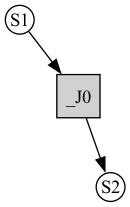

In [1]:
import tellurium as te

import numpy as np
import matplotlib.pylab as plt

# Load a model and carry out a simulation generating 100 points
r = te.loada ('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10')
r.draw(width=100)

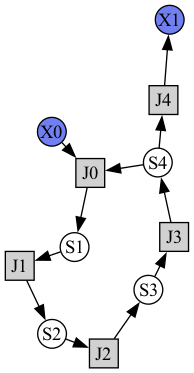

In [2]:
import tellurium as te


r = te.loada('''
model feedback()

   J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 +   S4^h);
   J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
   J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
   J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
   J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);

  // Species initializations:
  S1 = 0; S2 = 0; S3 = 0;
  S4 = 0; X0 = 10; X1 = 0;

  // Variable initialization:
  VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
end''')

# simulate using variable step size
r.integrator.setValue('variable_step_size', True)
r.draw(width=200,layout='fdp')

      J1, J2, J3, J4, J5, J6
S1 [[  1, -1,  0,  1,  0,  0],
S2  [  0,  1, -1,  0,  1,  0],
S3  [  0,  0,  0, -1, -1,  1]]



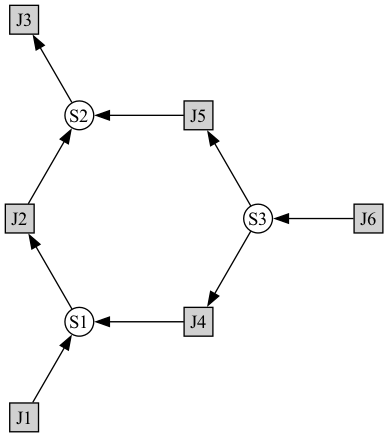

In [12]:
import tellurium as te

# Example of using antimony to create a stoichiometry matrix
r = te.loada('''
 J1: -> S1; v1;
 J2: S1 -> S2; v2;
 J3: S2 -> ; v3;
 J4: S3 -> S1; v4;
 J5: S3 -> S2; v5;
 J6: -> S3; v6;

 v1=1; v2=1; v3=1; v4=1; v5=1; v6=1;
''')

print(r.getFullStoichiometryMatrix())
r.draw(layout='circo')

In [6]:
import warnings
warnings.filterwarnings("ignore")

import tellurium as te
te.setDefaultPlottingEngine('matplotlib')

# model Definition
r = te.loada ('''
        #J1: S1 -> S2; Activator*kcat1*S1/(Km1+S1);
        J1: S1 -> S2; SE2*kcat1*S1/(Km1+S1);
        J2: S2 -> S1; Vm2*S2/(Km2+S2);

        J3: T1 -> T2; S2*kcat3*T1/(Km3+T1);
        J4: T2 -> T1; Vm4*T2/(Km4+T2);

        J5:    -> E2; Vf5/(Ks5+T2^h5);
        J6:    -> E3; Vf6*T2^h6/(Ks6+T2^h6);

        #J7:    -> E1;
        J8:    ->  S; kcat8*E1

        J9: E2 ->   ; k9*E2;
        J10:E3 ->   ; k10*E3;

        J11: S -> SE2; E2*kcat11*S/(Km11+S);
        J12: S -> SE3; E3*kcat12*S/(Km12+S);

        J13: SE2 ->  ; SE2*kcat13;
        J14: SE3 ->  ; SE3*kcat14;

        Km1 = 0.01; Km2 = 0.01; Km3 = 0.01; Km4 = 0.01; Km11 = 1; Km12 = 0.1;
        S1 = 6; S2 =0.1; T1=6; T2 = 0.1;
        SE2 = 0; SE3=0;
        S=0;
        E2 = 0; E3 = 0;
        kcat1 = 0.1; kcat3 = 3; kcat8 =1; kcat11 = 1; kcat12 = 1; kcat13 = 0.1; kcat14=0.1;
        E1 = 1;
        k9 = 0.1; k10=0.b1;
        Vf6 = 1;
        Vf5 = 3;
        Vm2 = 0.1;
        Vm4 = 2;
        h6 = 2; h5=2;
        Ks6 = 1; Ks5 = 1;
        Activator = 0;

        at (time > 100): Activator = 5;
''')
r.draw(width=300)
result = r.simulate (0, 300, 2000, ['time', 'J11', 'J12']);
r.plot(result)

Exception: Antimony: Error in model string, line 31:  Unparseable content in line 31.

In [7]:
import tellurium as te

antimony_str = '''
// Created by libAntimony v2.9
model *case_09()

// Compartments and Species:
compartment compartment_;
species MKKK in compartment_, MKKK_P in compartment_, MKK in compartment_;
species MKK_P in compartment_, MKK_PP in compartment_, MAPK in compartment_;
species MAPK_P in compartment_, MAPK_PP in compartment_;

// Reactions:
J0: MKKK => MKKK_P; (J0_V1*MKKK)/((1 + (MAPK_PP/J0_Ki)^J0_n)*(J0_K1 + MKKK));
J1: MKKK_P => MKKK; (J1_V2*MKKK_P)/(J1_KK2 + MKKK_P);
J2: MKK => MKK_P; (J2_k3*MKKK_P*MKK)/(J2_KK3 + MKK);
J3: MKK_P => MKK_PP; (J3_k4*MKKK_P*MKK_P)/(J3_KK4 + MKK_P);
J4: MKK_PP => MKK_P; (J4_V5*MKK_PP)/(J4_KK5 + MKK_PP);
J5: MKK_P => MKK; (J5_V6*MKK_P)/(J5_KK6 + MKK_P);
J6: MAPK => MAPK_P; (J6_k7*MKK_PP*MAPK)/(J6_KK7 + MAPK);
J7: MAPK_P => MAPK_PP; (J7_k8*MKK_PP*MAPK_P)/(J7_KK8 + MAPK_P);
J8: MAPK_PP => MAPK_P; (J8_V9*MAPK_PP)/(J8_KK9 + MAPK_PP);
J9: MAPK_P => MAPK; (J9_V10*MAPK_P)/(J9_KK10 + MAPK_P);

// Species initializations:
MKKK = 90;
MKKK_P = 10;
MKK = 280;
MKK_P = 10;
MKK_PP = 10;
MAPK = 280;
MAPK_P = 10;
MAPK_PP = 10;

// Compartment initializations:
compartment_ = 1;

// Variable initializations:
J0_V1 = 2.5;
J0_Ki = 9;
J0_n = 1;
J0_K1 = 10;
J1_V2 = 0.25;
J1_KK2 = 8;
J2_k3 = 0.025;
J2_KK3 = 15;
J3_k4 = 0.025;
J3_KK4 = 15;
J4_V5 = 0.75;
J4_KK5 = 15;
J5_V6 = 0.75;
J5_KK6 = 15;
J6_k7 = 0.025;
J6_KK7 = 15;
J7_k8 = 0.025;
J7_KK8 = 15;
J8_V9 = 0.5;
J8_KK9 = 15;
J9_V10 = 0.5;
J9_KK10 = 15;

// Other declarations:
const compartment_, J0_V1, J0_Ki, J0_n, J0_K1, J1_V2, J1_KK2, J2_k3, J2_KK3;
const J3_k4, J3_KK4, J4_V5, J4_KK5, J5_V6, J5_KK6, J6_k7, J6_KK7, J7_k8;
const J7_KK8, J8_V9, J8_KK9, J9_V10, J9_KK10;
end
'''

phrasedml_str = '''
  mod1 = model "case_09"
  # sim1 = simulate uniform_stochastic(0, 4000, 1000)
  sim1 = simulate uniform(0, 4000, 1000)
  task1 = run sim1 on mod1
  repeat1 = repeat task1 for local.x in uniform(0, 10, 10), reset=true
  plot "MAPK oscillations" repeat1.MAPK vs repeat1.time vs repeat1.MAPK_P, repeat1.MAPK vs repeat1.time vs repeat1.MAPK_PP, repeat1.MAPK vs repeat1.time vs repeat1.MKK
  # report repeat1.MAPK vs repeat1.time vs repeat1.MAPK_P, repeat1.MAPK vs repeat1.time vs repeat1.MAPK_PP, repeat1.MAPK vs repeat1.time vs repeat1.MKK
'''

# create the inline OMEX string
inline_omex = '\n'.join([antimony_str, phrasedml_str])

# execute the inline OMEX
te.executeInlineOmex(inline_omex)

AttributeError: module 'tellurium.teconverters' has no attribute 'inlineOmex'